# Gaming Data with Twitch

<img src="https://content.codecademy.com/projects/twitch/logo2.png" alt="Twitch Logo" style="background-color:white;"></img>

<a href="https://www.twitch.tv/">Twitch</a> is the world's leading live streaming platform for gamers, with 15 million daily active users. Using data to understand its users and products is one of the main responsibilities of the Twitch <a href="https://science.twitch.tv/">Science Team</a>.

In this project, you will be working with two tables that contain Twitch users’ stream viewing data and chat room usage data.

Stream viewing data:

|Headers|Description|
|:------|:----------|
|`time`|date and time (YYYY-MM-DD HH:MM:SS)|
|`device_id`|device ID|
|`login`|login ID|
|`channel`|streamer name|
|`country`|country name abbreviation|
|`player`|streamed device|
|`game`|game name|
|`stream_format`|stream quality|
|`subscriber`|is the viewer a subscriber? (true/false)|

Chat usage data:

|Headers|Description|
|:------|:----------|
|`time`|date and time (YYYY-MM-DD HH:MM:SS)|
|`device_id`|device ID|
|`login`|login ID|
|`channel`|streamer name|
|`country`|country name abbreviation|
|`player`|chat device|
|`game`|game name|

The Twitch Science Team provided this practice dataset. You can download the .csv files (800,000 rows) from <a href="https://github.com/Codecademy/datasets/tree/master/twitch">GitHub</a>.

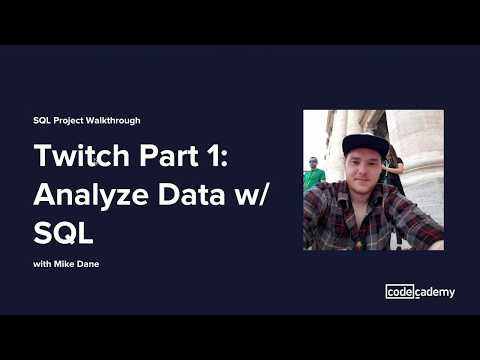

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('MBmLgw2xdqc', width = 800, height = 500)

In [2]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('gaming_data.db')

# stream = pd.read_csv('stream.csv')
# chat = pd.read_csv('chat.csv')

stream = pd.read_sql('''SELECT * FROM stream''', conn)
chat = pd.read_sql('''SELECT * FROM chat''', conn)

1. Start by getting a feel for the `stream` table and the `chat` table.

    Select the first 20 rows from each of the two tables.

    What are the column names?

In [3]:
stream.head(20)

,time,device_id,login,channel,country,player,game,stream_format,subscriber
0,2015-01-01 18:33:52,40ffc2fa6534cf760becbdbf5311e31ad069e46e,085c1eb7b587bfe654f0df7b4ba7f4fc4013636c,frank,US,iphone_t,League of Legends,None,None
1,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,0
2,2015-01-01 04:39:38,2f9c3f9ee1033b71a3819564243f20ef3bec0183,5b9a43e68f019185f55615d0b83019dee4b5d06f,frank,US,site,League of Legends,chunked,0
3,2015-01-01 11:15:30,0cda8226ba2583424c80c3c1c22c1256b080ad17,02c7797faa4d8a3ff4b0c14ee1764b6817b53d0b,estelle,CH,site,Dota 2,high,0
4,2015-01-01 11:28:19,e3288ca5e3153aa85e32f64cdd994b7666968dcf,b920c228acbcbebee26d9c79f6eb73b73a9480c7,morty,FR,site,Heroes of the Storm,medium,0
5,2015-01-01 23:27:36,343fe2bfd58595d5c18602d420ecf6f9d694d5a8,7814f661a54349ff5eee84f9d6f476918c9b7270,george,US,iphone_t,DayZ,None,None
6,2015-01-01 21:09:23,80a0c7d1abb6a5a0060e18202b77bef831e08ca5,eb158cab3f606d3894a32e20bddbfd2d589095a9,frank,US,site,League of Legends,high,1
7,2015-01-01 19:14:27,1e342e5e4e228f617449029054b3bb19c5224528,2aaf6a414bc3dc923b04f986de7ba1b8101c6698,frank,CA,site,League of Legends,high,0
8,2015-01-01 13:51:04,272cffbb1a9a33ad3bb48a2ee9ae5cbcac5ca22e,401716920e3435b5e3eec9fc4ccd6a44c7af38f5,kramer,TR,site,Counter-Strike: Global Offensive,chunked,0
9,2015-01-01 22:00:14,593ed161c456eeeb9e18b8005786d42abc1a7373,ef24dc49ceb4bcd3cccb0fa862d8a150ecf935e1,frank,US,site,League of Legends,medium,0


In [4]:
chat.head(20)

,time,device_id,login,channel,country,player,game
0,2015-01-01 18:45:50,70e2b95b5ac0d4c227e46966658d16b3e044996e,5c2f5c1f19a7738e16ed0be551d865e8a8fce71d,jerry,BY,None,Dota 2
1,2015-01-01 01:16:57,f2b9065b55fd80d6aa653ce989b489f4ec5198be,0d77740e4fb5ce77d94f9f6c8ef1f762990d0344,elaine,HK,None,Devil May Cry 4: Special Edition
2,2015-01-01 16:22:10,d448ba963d7e1023dd1b0a40b95d4f6611750692,77ab14c1fb815e1c369ba0cf7d4c56b4fe489997,frank,GB,iphone_t,League of Legends
3,2015-01-01 03:58:13,8d6823dc52b400b50aebf269bf1f03a36d19eeaa,91cb88c0743761589273fc5e800e7743ece46494,frank,US,iphone_t,League of Legends
4,2015-01-01 11:47:35,16c1e39594d62358d27ae604ad43a071f0d86bc4,51a9234f83d656607cfd7f26690c12d2ffbce353,estelle,DE,None,Dota 2
5,2015-01-01 17:59:51,6fcc75522de37833a0fb21fba4965aad3b63ea57,f628d1cb946ea2e8cffc0b327bc9d77775b8d3c0,jerry,RU,None,Dota 2
6,2015-01-01 02:24:33,dea94b3030025d837dd841fbfd479e775987f65d,9dbbcf6c7792074771c4c7284807041eac467ad5,elaine,TW,None,Gaming Talk Shows
7,2015-01-01 18:26:34,671bee0f3d66077876d9bc231990597292392cc2,51c286a41daa8e060275f622f2b8436bee9fab91,jerry,UA,None,Dota 2
8,2015-01-01 13:13:18,8b31d5ebd1f4f41d4365ae4a471c1686dd256745,06decad1d9565150791e183da017f47123433a4c,estelle,GB,ipad_t,Dota 2
9,2015-01-01 20:20:55,f2ebb129e6930e608f2ed3f5fb52bc4d533c4891,4679f8113aa157ba76fc6db5878d7ee625e88d55,frank,CA,None,League of Legends


In [5]:
stream_columns = list(stream)
for column in stream_columns:
    print(column)

time
device_id
login
channel
country
player
game
stream_format
subscriber


In [6]:
chat_columns = list(chat)
for column in chat_columns:
    print(column)

time
device_id
login
channel
country
player
game


2. What are the unique `games` in the `stream` table?

In [7]:
unique_games = list(stream.game.unique())
for game in unique_games:
    print(game)

League of Legends
DayZ
Dota 2
Heroes of the Storm
Counter-Strike: Global Offensive
Hearthstone: Heroes of Warcraft
The Binding of Isaac: Rebirth
Agar.io
Gaming Talk Shows
None
Rocket League
World of Tanks
ARK: Survival Evolved
SpeedRunners
Breaking Point
Duck Game
Devil May Cry 4: Special Edition
Block N Load
Fallout 3
Batman: Arkham Knight
Reign Of Kings
The Witcher 3: Wild Hunt
The Elder Scrolls V: Skyrim
Super Mario Bros.
H1Z1
The Last of Us
Depth
Mortal Kombat X
Senran Kagura: Estival Versus
The Sims 4
You Must Build A Boat
Choice Chamber
Music
Risk of Rain
Grand Theft Auto V
Besiege
Super Mario Bros. 3
Hektor
Bridge Constructor Medieval
Lucius
Blackjack
Cities: Skylines


3. What are the unique `channel`s in the `stream` table?

In [8]:
unique_channels = list(stream.channel.unique())
for channel in unique_channels:
    print(channel)

frank
george
estelle
morty
kramer
jerry
helen
newman
elaine
susan


## Aggregate Functions:

4. What are the most popular `game`s in the `stream` table?

    Create a list of games and their number of viewers using `groupby`.

In [9]:
popular_games = stream\
                .groupby('game')\
                .login.count()\
                .reset_index()\
                .rename(columns={'login': 'counts'})\
                .sort_values(by='counts', ascending=False)
                
popular_games

,game,counts
23,League of Legends,193533
14,Dota 2,85608
10,Counter-Strike: Global Offensive,54438
11,DayZ,38004
22,Heroes of the Storm,35310
34,The Binding of Isaac: Rebirth,29467
17,Gaming Talk Shows,28115
39,World of Tanks,15932
20,Hearthstone: Heroes of Warcraft,14399
1,Agar.io,11480


5. These are some big numbers from the game League of Legends (also known as LoL).

    Where are these LoL stream viewers located?

    Create a list of countries and their number of LoL viewers.

In [10]:
lol_country_distribution = stream[stream.game == 'League of Legends']\
                            .groupby('country')\
                            .login.count()\
                            .reset_index()\
                            .rename(columns={'login': 'counts'})\
                            .sort_values(by='counts', ascending=False)

lol_country_distribution

,country,counts
147,US,85606
27,CA,13034
36,DE,10835
51,GB,6964
143,TR,4412
...,...,...
1,AD,1
137,SN,1
136,SM,1
61,GY,1


6. The `player` column contains the source the user is using to view the stream (`site`, `iphone`, `android`, etc).

    Create a list of `player`s and their number of streamers.

In [11]:
popular_players = stream\
                .groupby('player')\
                .login.count()\
                .reset_index()\
                .rename(columns={'login': 'counts'})\
                .sort_values(by='counts', ascending=False)
                
popular_players

,player,counts
13,site,246115
9,iphone_t,100689
1,android,93508
8,ipad_t,53646
4,embed,19819
15,xbox_one,4863
7,home,3479
6,frontpage,1567
0,amazon,1155
14,xbox360,985


7. Create a new column named `genre` for each of the games.

    Group the games into their genres: Multiplayer Online Battle Arena (MOBA), First Person Shooter (FPS), Survival, and Other.

    Using CASE, your logic should be:

    * If League of Legends → MOBA
    * If Dota 2 → MOBA
    * If Heroes of the Storm → MOBA
    * If Counter-Strike: Global Offensive → FPS
    * If DayZ → Survival
    * If ARK: Survival Evolved → Survival
    * Else → Other

    Use GROUP BY and ORDER BY to showcase only the unique game titles.

In [12]:
def classify_genre(game_name):
    if game_name in ['League of Legends', 'Dota 2', 'Heroes of the Storm']:
        return 'MOBA'
    if game_name == 'Counter-Strike: Global Offensive':
        return 'FPS'
    if game_name in ['DayZ', 'ARK: Survival Evolved']:
        return 'Survival'
    else:
        return 'Other'

stream['genre'] = stream.apply(lambda row: (classify_genre(row['game'])), axis=1)
stream

,time,device_id,login,channel,country,player,game,stream_format,subscriber,genre
0,2015-01-01 18:33:52,40ffc2fa6534cf760becbdbf5311e31ad069e46e,085c1eb7b587bfe654f0df7b4ba7f4fc4013636c,frank,US,iphone_t,League of Legends,None,None,MOBA
1,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,0,Survival
2,2015-01-01 04:39:38,2f9c3f9ee1033b71a3819564243f20ef3bec0183,5b9a43e68f019185f55615d0b83019dee4b5d06f,frank,US,site,League of Legends,chunked,0,MOBA
3,2015-01-01 11:15:30,0cda8226ba2583424c80c3c1c22c1256b080ad17,02c7797faa4d8a3ff4b0c14ee1764b6817b53d0b,estelle,CH,site,Dota 2,high,0,MOBA
4,2015-01-01 11:28:19,e3288ca5e3153aa85e32f64cdd994b7666968dcf,b920c228acbcbebee26d9c79f6eb73b73a9480c7,morty,FR,site,Heroes of the Storm,medium,0,MOBA
...,...,...,...,...,...,...,...,...,...,...
526294,2015-01-01 19:50:26,a4fb5414dc49966ab1c4601f3e8937a4ca0f0345,3bc97fa0d7e594d93973d11e10d87b7234339a57,helen,CA,site,Hearthstone: Heroes of Warcraft,chunked,0,Other
526295,2015-01-01 15:07:36,74c78ab7bc50c2c7b83a304a395d3b8959a62bf0,64b8f14d232315be42e0f0ab37a2524b583b48b9,newman,FI,android,The Binding of Isaac: Rebirth,None,None,Other
526296,2015-01-01 02:10:01,056c67d4521ad0fab6c727fd8cedda52a5ddd572,41c2376a1d1ad37299f0ec07e3a6cf5566c7a7dd,frank,AT,android,League of Legends,None,None,MOBA
526297,2015-01-01 17:03:27,a37d6f2f3fe943c54bff192d1b8884f2770fe430,a5f6db88afb5fc4ab7382dcdfbb109888796d45a,frank,DK,ipad_t,League of Legends,None,None,MOBA


8. Write a query that returns two columns:

    * The hours of the time column
    * The view count for each hour

    Lastly, filter the result with only the users in your country using a WHERE clause.

In [13]:
# stream['timestamp'] = stream.apply(lambda row: pd.to_datetime(row['time'], format='%Y-%m-%d %H:%M:%S'), axis=1)

In [14]:
stream['time'] = pd.to_datetime(stream['time'])
stream['hour'] = stream['time'].dt.hour

viewer_time_distribution = stream[stream.country == 'US']\
                .groupby('hour')\
                .login.count()\
                .reset_index()\
                .rename(columns={'login': 'counts'})\
                .sort_values(by='hour')
                
viewer_time_distribution

,hour,counts
0,0,7025
1,1,4693
2,2,5961
3,3,4236
4,4,3567
5,5,1597
6,6,236
7,7,338
8,8,935
9,9,1214


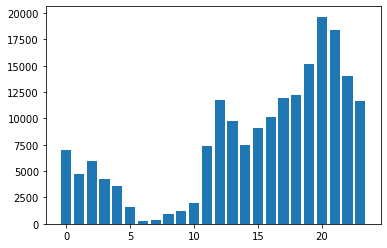

In [15]:
import matplotlib.pyplot as plt 

plt.bar(viewer_time_distribution.hour, viewer_time_distribution.counts)
plt.show()

9. The stream table and the chat table share a column: `device_id`.

   Join the two tables on that column.

In [16]:
merged_table = stream.join(chat.set_index('device_id'), on='device_id', lsuffix='_stream', rsuffix='_chat')
merged_table.head()

,time_stream,device_id,login_stream,channel_stream,country_stream,player_stream,game_stream,stream_format,subscriber,genre,hour,time_chat,login_chat,channel_chat,country_chat,player_chat,game_chat
0,2015-01-01 18:33:52,40ffc2fa6534cf760becbdbf5311e31ad069e46e,085c1eb7b587bfe654f0df7b4ba7f4fc4013636c,frank,US,iphone_t,League of Legends,None,None,MOBA,18,2015-01-01 22:43:57,085c1eb7b587bfe654f0df7b4ba7f4fc4013636c,frank,US,iphone_t,League of Legends
1,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,0,Survival,23,2015-01-01 21:23:49,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,None,DayZ
1,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,0,Survival,23,2015-01-01 22:00:41,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,None,DayZ
1,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,0,Survival,23,2015-01-01 20:41:16,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,None,DayZ
1,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,0,Survival,23,2015-01-01 20:46:02,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,None,DayZ


10. Woohoo! You have completed the the guided practice, see what else you can dig up. For example:

    * What are your favorite games? Can you find some insights about its viewers and chat room users?
    * Is there anything you can do after joining the two tables?

## Visualize Twitch Data with Matplotlib

<img src="https://content.codecademy.com/projects/twitch/logo2.png" alt="Twitch Logo" style="background-color:white;"></img>

Now that you’ve conducted some analysis with SQL, you will be taking your findings from the SQL queries and visualize them using Python and Matplotlib, in the forms of:

- **Bar Graph**: Featured Games
- **Pie Chart**: Stream Viewers' Locations
- **Line Graph**: Time Series Analysis

In [17]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Bar Graph: Featured Games
games = ["LoL", "Dota 2", "CS:GO", "DayZ", "HOS", "Isaac", "Shows", "Hearth", "WoT", "Agar.io"]
viewers =  [1070, 472, 302, 239, 210, 171, 170, 90, 86, 71]

# Pie Chart: League of Legends Viewers' Whereabouts
labels = ["US", "DE", "CA", "N/A", "GB", "TR", "BR", "DK", "PL", "BE", "NL", "Others"]
countries = [447, 66, 64, 49, 45, 28, 25, 20, 19, 17, 17, 279]

# Line Graph: Time Series Analysis
hour = range(24)
viewers_hour = [30, 17, 34, 29, 19, 14, 3, 2, 4, 9, 5, 48, 62, 58, 40, 51, 69, 55, 76, 81, 102, 120, 71, 63]

1. Twitch's home page has a <a href="https://content.codecademy.com/projects/twitch/featured.png">Featured Games</a> section where it lists the "Games people are watching now".

    In the previous part of the project, you used SQL to find the top 10 trending games (on January 1st, 2015) and their number of viewers.

    It looked something like this:

    <img src="https://content.codecademy.com/projects/twitch/featured-sql.png" alt="Query Results" style="background-color:white;" width=500></img>

    In the next few tasks, you are going to take this data and plot a bar graph using Matplotlib.

    Let us get started!

The **Featured Games** section looks like:

<img src="https://content.codecademy.com/projects/twitch/featured.png" alt="Featured Games" style="background-color:white;" width=500></img>

2. The games and viewers are already loaded in the workbook:

    `games = ["LoL", "Dota 2", "CS:GO", "DayZ", "HOS", "Isaac", "Shows", "Hearth", "WoT", "Agar.io"]`
    
    `viewers =  [1070, 472, 302, 239, 210, 171, 170, 90, 86, 71]`

    Now, use the `plt.bar()` to plot a bar graph using `range(len(games))` and viewers as arguments.

    Feel free to pick a color, too `(using color='____')`.

    Then, use `plt.show()` to visualize it.

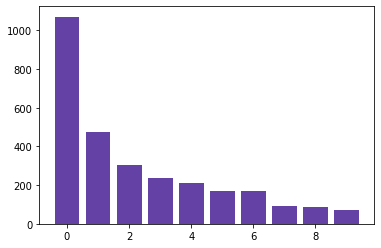

In [18]:
plt.bar(range(len(games)), viewers, color='#6441A5')
plt.show()

3. Awesome, let us make the graph more informative by doing the following:

    * Add a title
    * Add a legend
    * Add axis labels
    * Add ticks
    * Add tick labels (rotate if necessary)

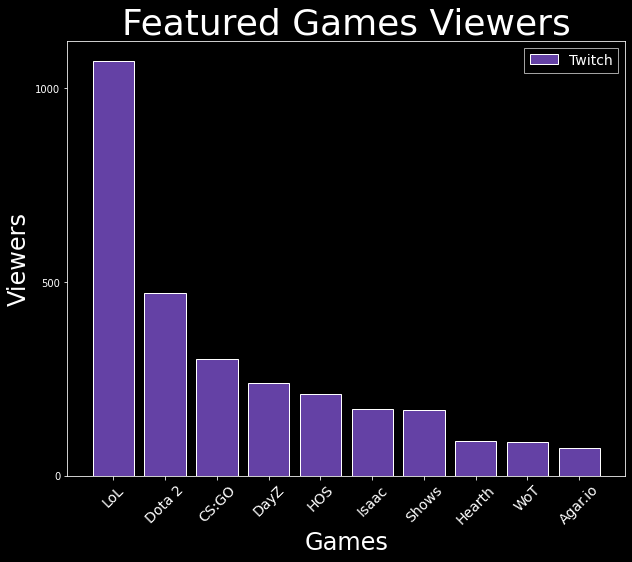

In [19]:
plt.style.use('dark_background')
plt.figure(figsize=(10,8))
plt.bar(range(len(games)), viewers, color='#6441A5', edgecolor='white')
plt.title('Featured Games Viewers', fontsize=36)
plt.legend(["Twitch"], fancybox=False, fontsize=14)
plt.xlabel('Games', fontsize=24)
plt.ylabel('Viewers', fontsize=24)
ax = plt.subplot()
ax.set_xticks(range(0, 10))
ax.set_xticklabels(games, rotation=45, fontsize=14)
ax.set_yticks([0, 500, 1000])
plt.show()

## Pie Chart: League of Legends Viewers' Whereabouts

5. There are 1070 League of Legends viewers from this dataset. Where are they coming from?

    When you performed the SQL query, you got this result:
    
    <img src="https://content.codecademy.com/projects/twitch/countries-sql.png" alt="Query Results" style="background-color:white;" width=500></img>

    As well as other countries that accounted for another 279 stream viewers.

    In the next few tasks, you are going to take this data and make a pie chart.

    Let us get started!

- **US** - United States <img src="https://content.codecademy.com/projects/twitch/flags/murica.png" width=25 alt="Hello World"></img>
- **DE** - Germany <img src="https://content.codecademy.com/projects/twitch/flags/germany.png" width=25 alt="Hallo Welt"></img>
- **CA** - Canada <img src="https://content.codecademy.com/projects/twitch/flags/canada.png" width=25 alt="Hi"></img>
- **∅** - N/A
- **GB** - Great Britain <img src="https://content.codecademy.com/projects/twitch/flags/great-britain.png" width=25 alt="Rubbish"></img>
- **TR** - Turkey <img src="https://content.codecademy.com/projects/twitch/flags/turkey.png" width=25 alt="Selam Dünya"></img>
- **BR** - Brazil <img src="https://content.codecademy.com/projects/twitch/flags/brazil.png" width=25 alt="Olá Mundo"></img>
- **DK** - Denmark <img src="https://content.codecademy.com/projects/twitch/flags/denmark.png" width=25 alt="Hej Verden"></img>
- **PL** - Poland <img src="https://content.codecademy.com/projects/twitch/flags/poland.png" width=25 alt="Witaj świecie"></img>
- **BE** - Belgium <img src="https://content.codecademy.com/projects/twitch/flags/belgium.png" width=25 alt="Hallo Wereld"></img>
- **NL** - Netherlands <img src="https://content.codecademy.com/projects/twitch/flags/netherlands.png" width=25 alt="Hello wereld opnieuw!"></img>
- **Others**

6. The labels and countries are already loaded in the workbook:

    `labels = ["US", "DE", "CA", "N/A", "GB", "TR", "BR", "DK", "PL", "BE", "NL", "Others"]`
 
    `countries = [447, 66, 64, 49, 45, 28, 25, 20, 19, 17, 17, 279]`
 
    Let us add some colors!

    Because there are 12 countries (including N/A and Others), let us create an array called colors and add 12 color codes to it, like so:

    `colors = ['lightskyblue', 'gold', 'lightcoral', 'gainsboro', 'royalblue', 'lightpink', 'darkseagreen', 'sienna', 'khaki', 'gold', 'violet', 'yellowgreen']`

    Check out the <a href="https://matplotlib.org/examples/color/named_colors.html">Matplotlib color codes</a> to find your inner Bob Ross.

    Then, use `plt.pie()` to plot a pie chart.

    Do not forget to throw in the countries variable and the `colors=colors`.

    Lastly, use `plt.show()` to visualize it.

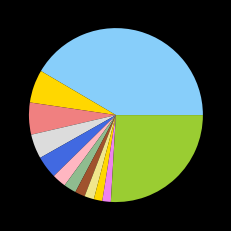

In [20]:
colors = ['lightskyblue', 'gold', 'lightcoral', 'gainsboro', 'royalblue', 'lightpink', 'darkseagreen', 'sienna', 'khaki', 'gold', 'violet', 'yellowgreen']
plt.pie(countries, colors=colors)
plt.show()

7. Optional: Let us make it more visually appealing and more informative.

    First, let us "explode", or break out, the 1st slice (United States):

    `explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)`

    Then, inside `plt.pie()`, we are going to:

    * Add the explode
    * Add shadows
    * Turn the pie 345 degrees
    * Add percentages
    * Configure the percentages’ placement

    `So it look something like:`

    `plt.pie(countries, explode=explode, colors=colors, shadow=True, startangle=345, autopct='%1.0f%%', pctdistance=1.15)`

    Also, we can add a title:

    `plt.title("League of Legends Viewers' Whereabouts")`

    And legends:

    `plt.legend(labels, loc="right")`

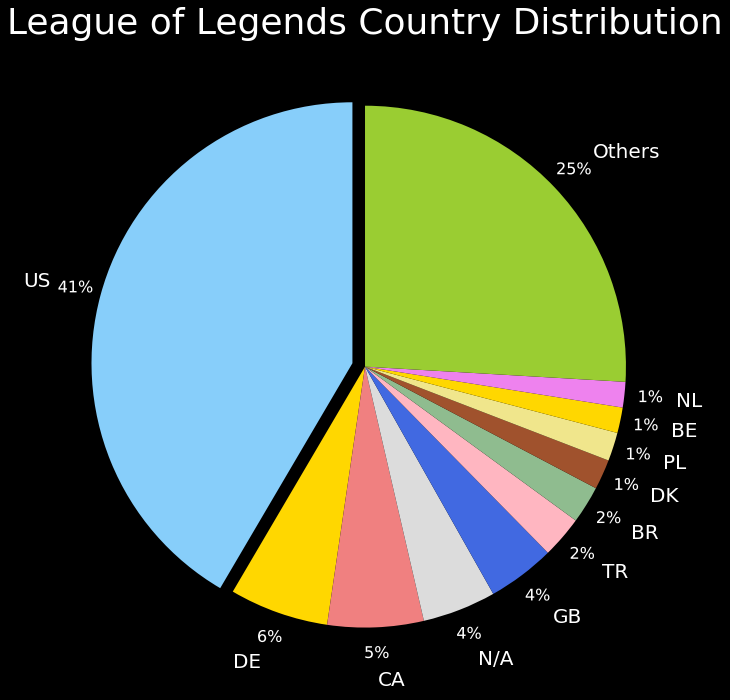

In [21]:
import matplotlib.patheffects as PathEffects

colors = ['lightskyblue', 'gold', 'lightcoral', 'gainsboro', 'royalblue', 'lightpink', 'darkseagreen', 'sienna', 'khaki', 'gold', 'violet', 'yellowgreen']
explode = (0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

fig, ax = plt.subplots(figsize=(12,12), subplot_kw=dict(aspect="equal"))
patches, texts, autotexts  = ax.pie(countries, explode=explode, labels=labels, autopct='%d%%', colors=colors, pctdistance=1.1, labeldistance=1.2, textprops={'fontsize': 20}, startangle=90)
for autotext in autotexts:
    autotext.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='black')])
    autotext.set_fontsize(16)
ax.set_title("League of Legends Country Distribution", fontsize=36)
plt.show()

## Line Graph: Time Series Analysis

9. We were able to find the number of US viewers at different hours of the day on January 1st, 2015:
    
    <img src="https://content.codecademy.com/projects/twitch/countries-sql.png" alt="24 Hours" style="background-color:white;" width=500></img>

    Let us make this into a line graph.

10. The `hour` and `viewers_hour` are already loaded into the workspace:

    `hour = range(24)`
 
    `viewers_hour = [30, 17, 34, 29, 19, 14, 3, 2, 4, 9, 5, 48, 62, 58, 40, 51, 69, 55, 76, 81, 102, 120, 71, 63]`

    Use `plt.plot()` to plot a line graph.

    Do not forget to throw in `hour` and `viewers_hour`.

    Then, add the title, the axis labels, legend, and ticks.

    Lastly, use `plt.show()` to visualize.

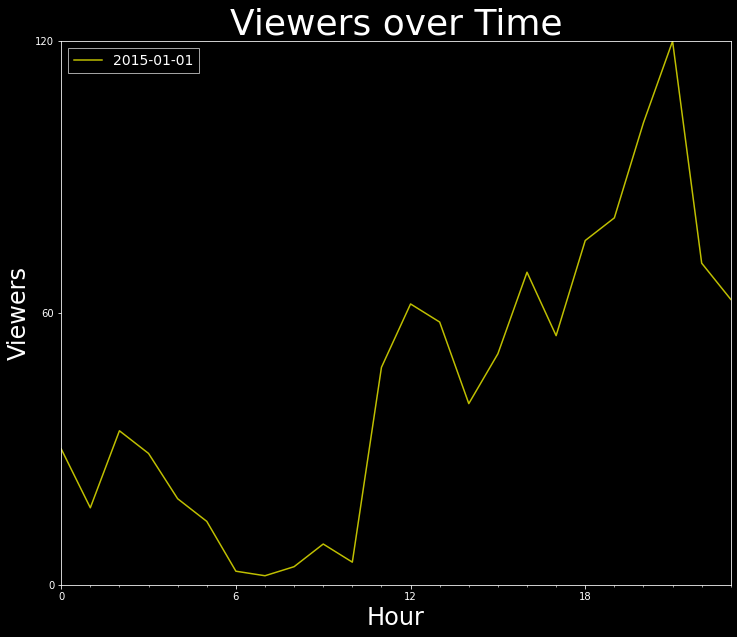

In [22]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax = plt.subplots(figsize=(12,10))
ax = plt.subplot()
ax.plot(hour, viewers_hour, color='y')
ax.set_title("Viewers over Time", fontsize=36)
ax.set_xlabel("Hour", fontsize=24)
ax.set_ylabel("Viewers", fontsize=24)
ax.legend(['2015-01-01'], fancybox=False, fontsize=14)
ax.set_yticks([0, 60, 120])
ax.xaxis.set_major_locator(MultipleLocator(6))
ax.xaxis.set_major_formatter('{x:0.0f}')
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.set_xlim([0,23])
ax.set_ylim([0,120])
plt.show()

11. There is some uncertainty in these numbers because some people leave their browsers open. Let us account for a 15% error in the `viewers_hour` data.

    First, create a list containing the upper bound of the `viewers_hour` and call it `y_upper`.

    Then, create a list containing the lower bound of the `viewers_hour` and call it `y_lower`.

    Lastly, use `plt.fill_between()` to shade the error, with an alpha of 0.2.

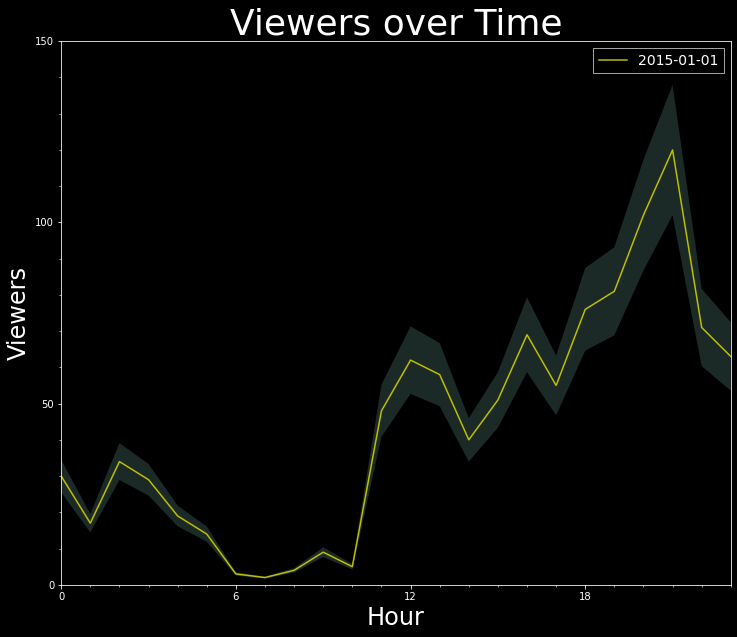

In [23]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

y_upper = [i + (i * 0.15) for i in viewers_hour]
y_lower = [i - (i * 0.15) for i in viewers_hour]

fig, ax = plt.subplots(figsize=(12,10))
ax = plt.subplot()
ax.plot(hour, viewers_hour, color='y')
ax.fill_between(hour, y_lower, y_upper, alpha=0.2)

ax.set_title("Viewers over Time", fontsize=36)
ax.set_xlabel("Hour", fontsize=24)
ax.set_ylabel("Viewers", fontsize=24)
ax.legend(['2015-01-01'], fancybox=False, fontsize=14)

ax.yaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_major_formatter('{x:0.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(10))

ax.xaxis.set_major_locator(MultipleLocator(6))
ax.xaxis.set_major_formatter('{x:0.0f}')
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.set_xlim([0,23])
ax.set_ylim([0,150])

plt.show()